In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('data/prophetData.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


C:\Users\Boris\Anaconda3\envs\tensorflow37_env\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


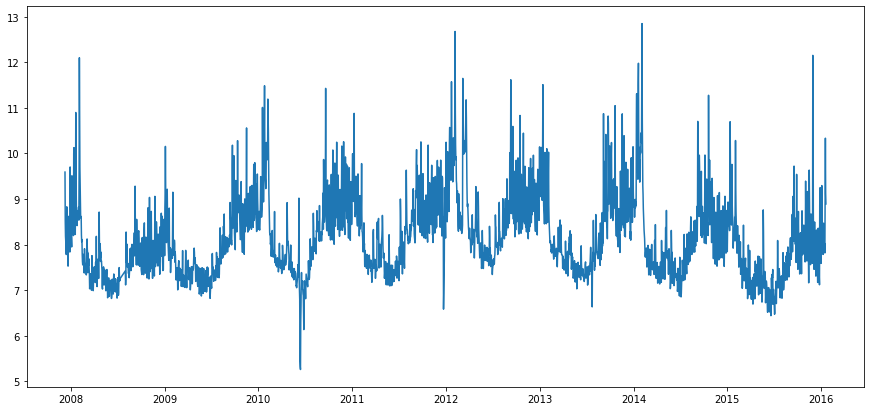

In [3]:
plt.figure(figsize=(15,7))
plt.plot(df.ds, df.y)
plt.show();

In [24]:
df = pd.read_csv('data/AAPL.csv')
df.columns = ['ds', 'Open', 'High', 'Low', 'y', 'Adj Close', 'Volume']
df.head()

,ds,Open,High,Low,y,Adj Close,Volume
0,2017-10-20,156.610001,157.750000,155.960007,156.250000,151.570633,23974100
1,2017-10-23,156.889999,157.690002,155.500000,156.169998,151.493027,21984300
2,2017-10-24,156.289993,157.419998,156.199997,157.100006,152.395187,17757200
3,2017-10-25,156.910004,157.550003,155.270004,156.410004,151.725845,21207100
4,2017-10-26,157.229996,157.830002,156.779999,157.410004,152.695908,17000500


In [26]:
validation_fraction = 0.2

validation_size = int(df.shape[0] * validation_fraction)
df_train = df.iloc[:-validation_size]
df_validation = df.iloc[-validation_size:]
print(df_train.shape)
print(df_validation.shape)

(402, 7)
(100, 7)


In [27]:
import Chronos

In [28]:
import importlib
importlib.reload(Chronos)

<module 'Chronos' from 'C:\\Users\\Boris\\Documents\\Chronos\\Chronos.py'>

In [30]:
my_cr = Chronos.Chronos(G=300)

In [ ]:
train_history, validation_history = my_cr.fit(df_train, df_validation)

In [ ]:
plt.figure()
plt.plot(train_history, label="train")
plt.plot(validation_history, label="val")
plt.legend()
plt.show();